# RAG Analyses Along the X-Axis
Here, we'll analyze the data by constructing Region Adjecency Grapghs layer-by-layer along the x-axis.

## Importing modules and setting up the data

In [2]:
import csv
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.spatial import Delaunay
import numpy as np
import math
import skimage
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import future
import networkx as nx
from ragGen import *
%matplotlib inline

In [3]:
# Read in the data
data = open('../../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

# These will come in handy later
sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

In [9]:
real_volume = np.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    real_volume[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]

## Non-linear edge weighted RAGs

First, we'll start by looking at the RAGs with edges weighted non-linearly. 

### Generating the RAGs and distributions

In [16]:
x_rags = []
for layer in real_volume:
    x_rags.append(generate_rag(layer, False))
len(x_rags)

108

Now we have a list of 108 region adjacency graphs for each x-layer. Now we want to measure properties of those graphs and see how the properties vary in the x direction. Next we need to get edge weight distributions for each layer.

In [17]:
def get_edge_weight_distributions(rags):
    distributions = []
    for rag in rags:    
        itty = rag.edges_iter()
        weight_list = []
        for index in range(rag.number_of_edges()):
            eddy = itty.next()
            weight_list.append(rag.get_edge_data(eddy[0], eddy[1])['weight'])

        distributions.append(weight_list)
    return distributions

In [15]:
distributions = get_edge_weight_distributions(x_rags)

### Edge Weight Histograms - Each Layer
Here, we'll see what the edge weight distributions look like for each layer.

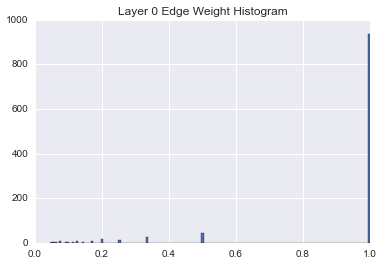

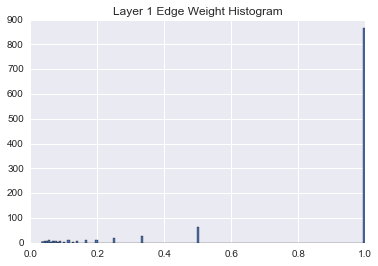

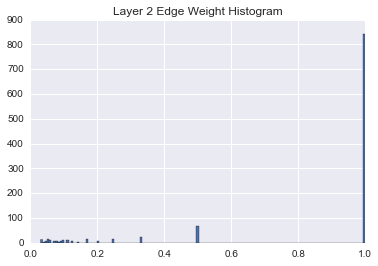

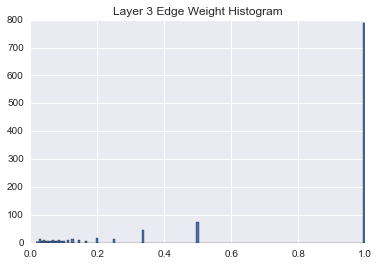

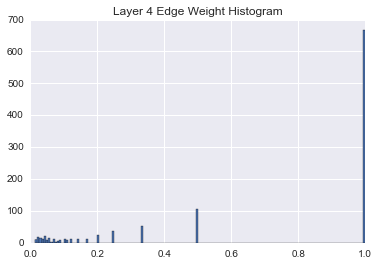

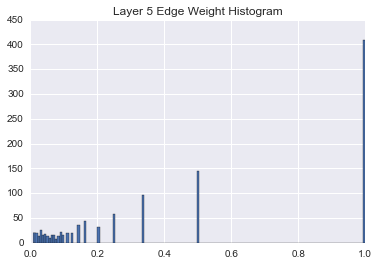

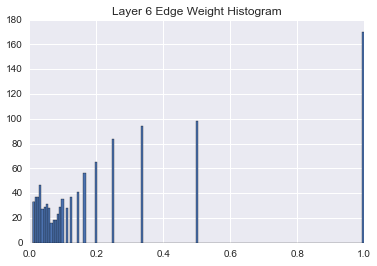

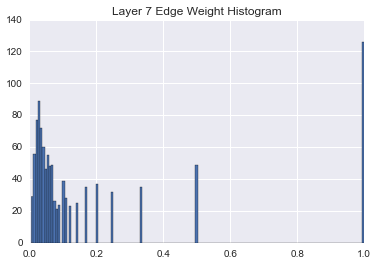

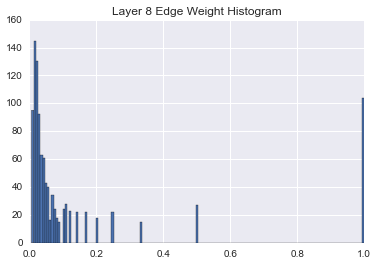

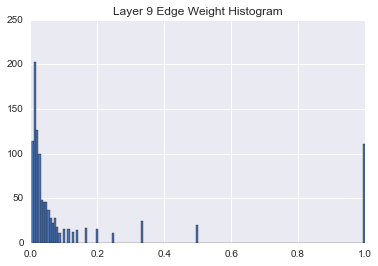

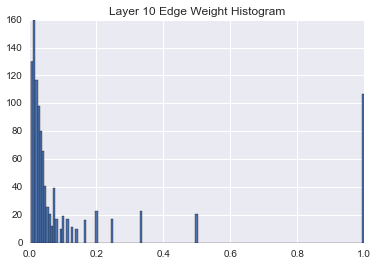

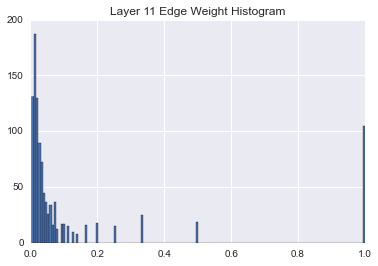

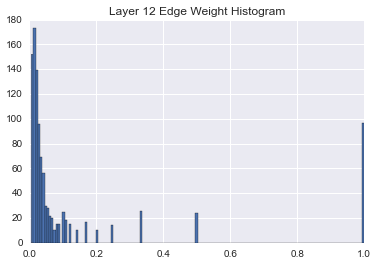

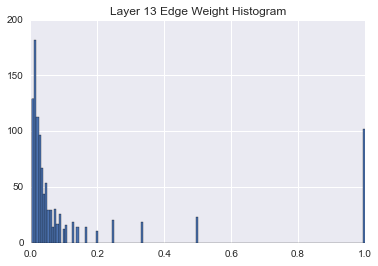

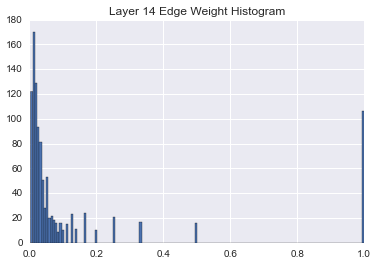

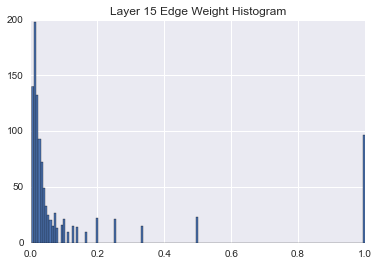

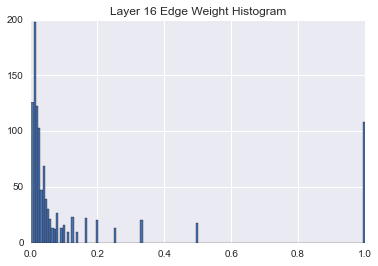

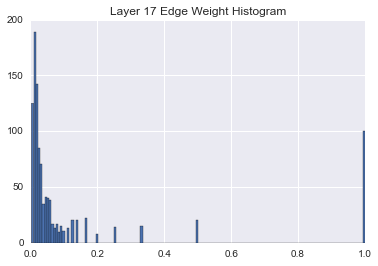

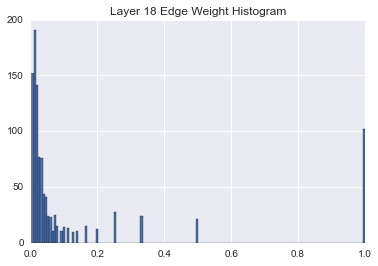

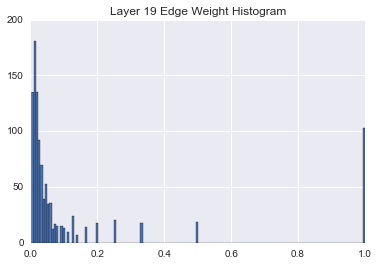

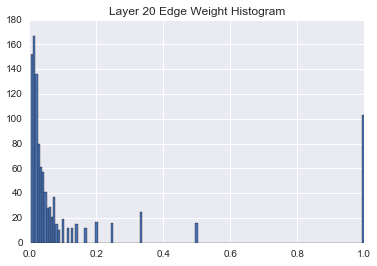

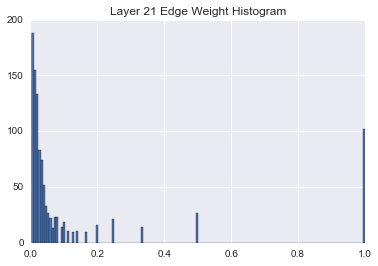

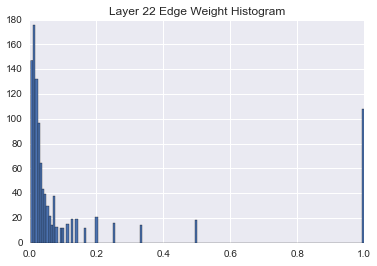

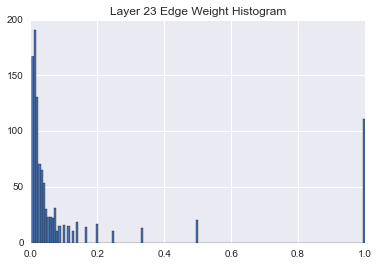

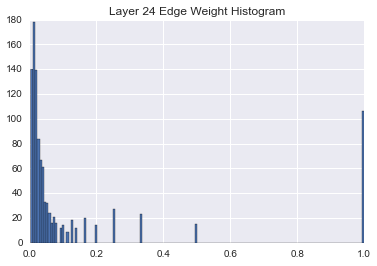

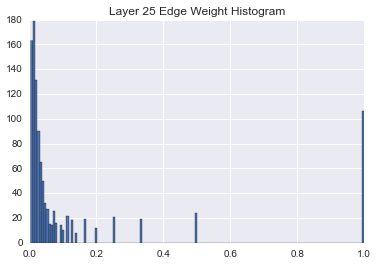

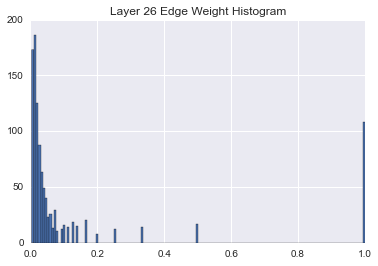

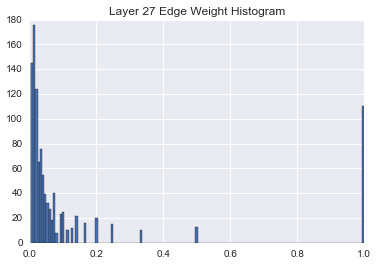

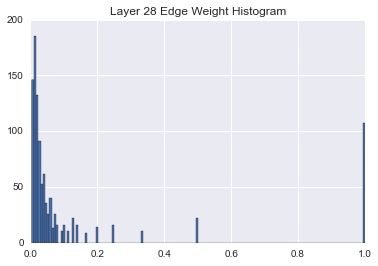

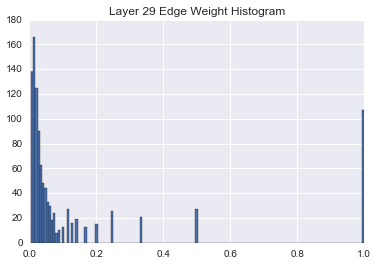

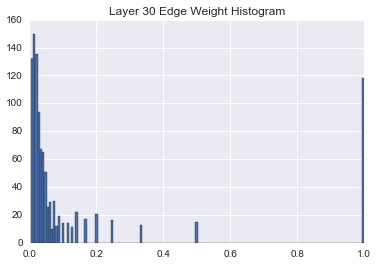

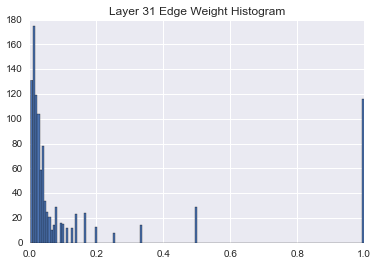

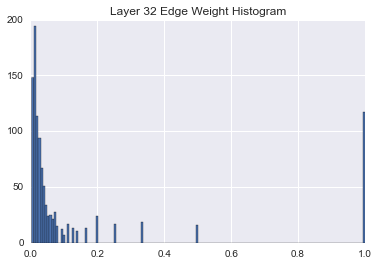

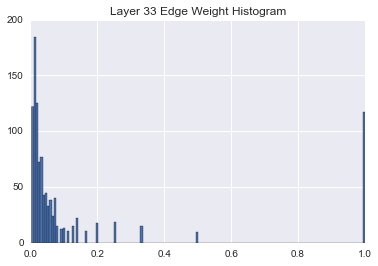

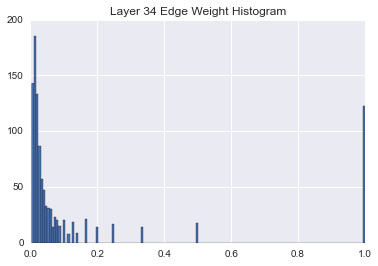

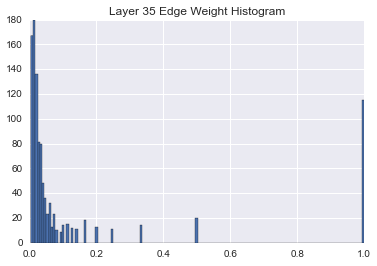

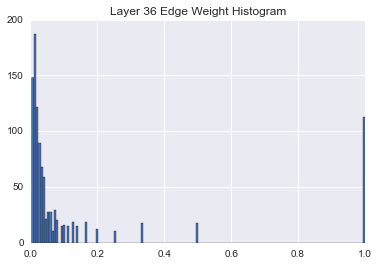

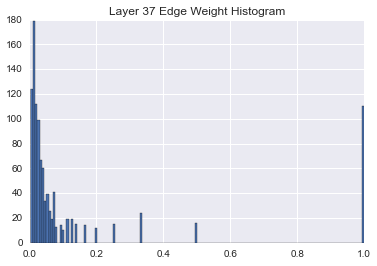

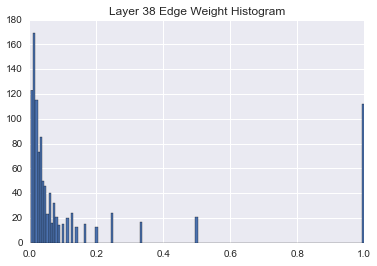

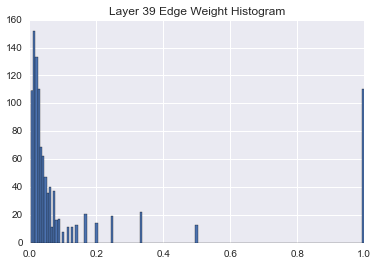

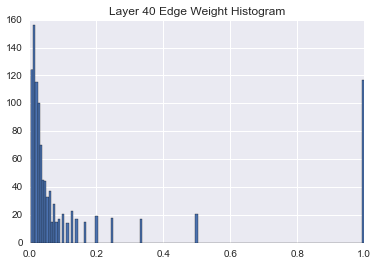

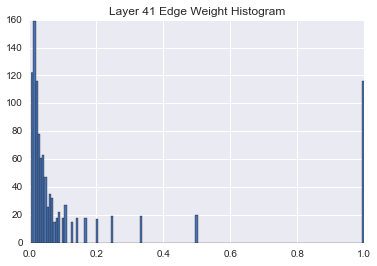

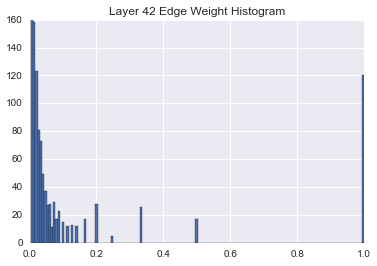

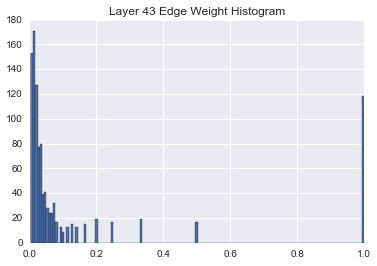

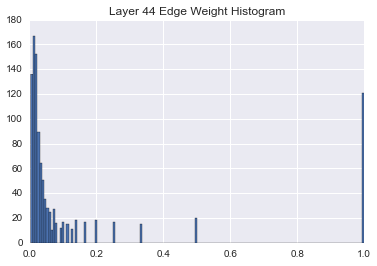

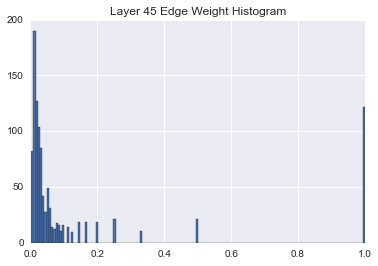

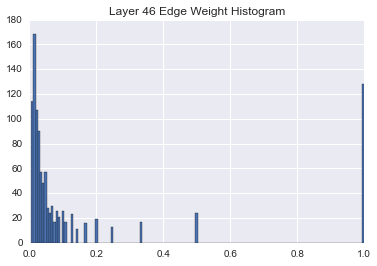

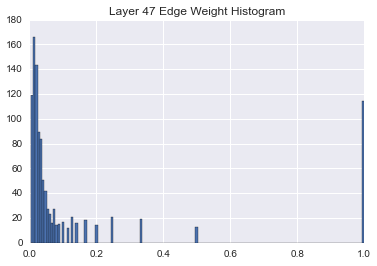

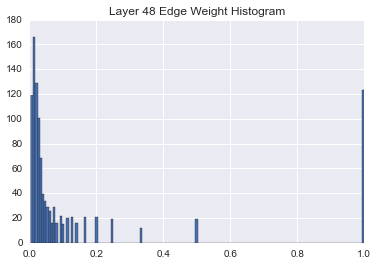

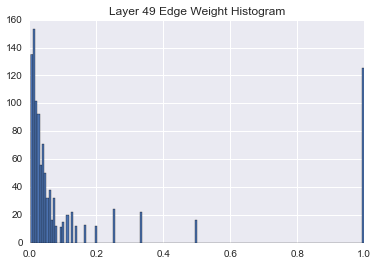

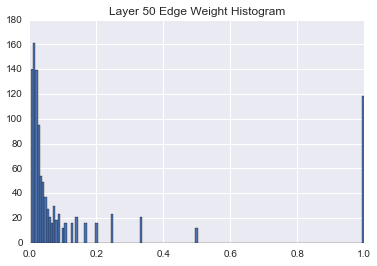

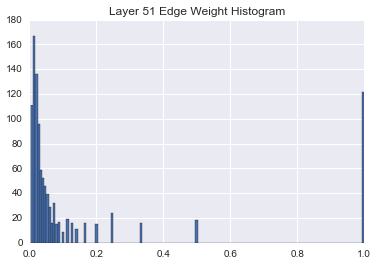

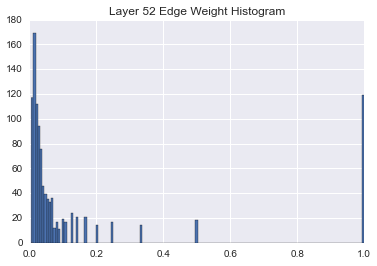

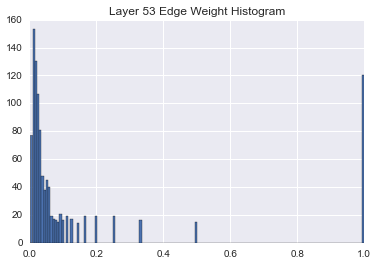

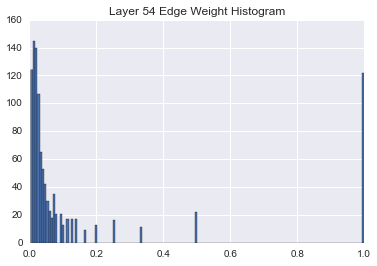

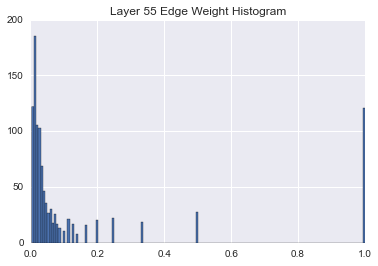

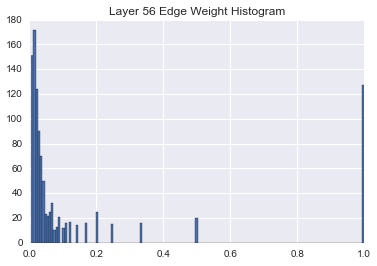

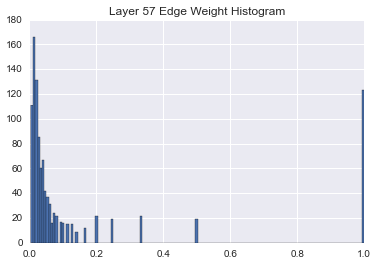

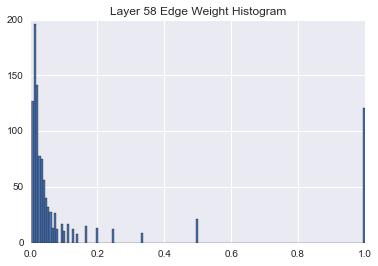

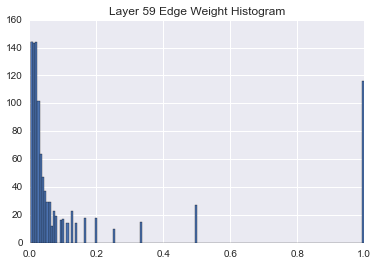

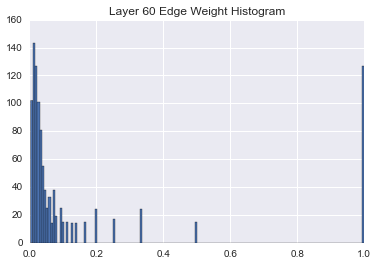

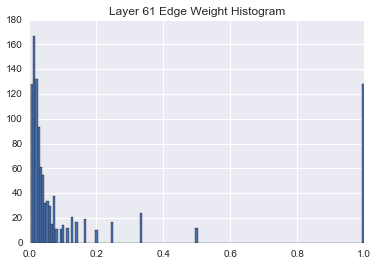

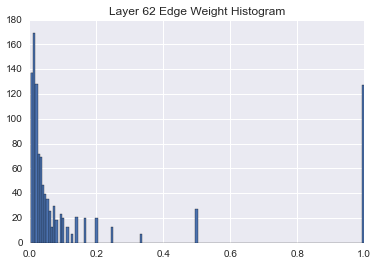

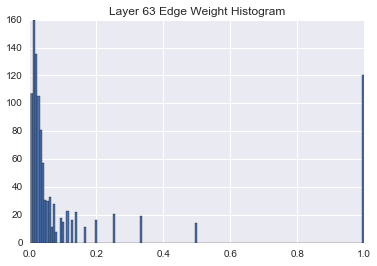

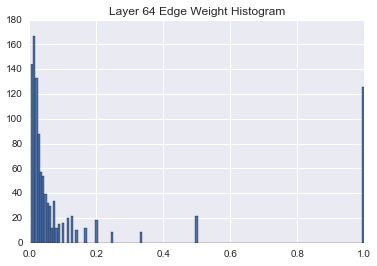

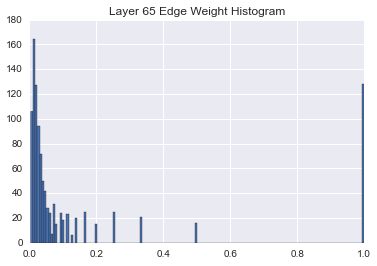

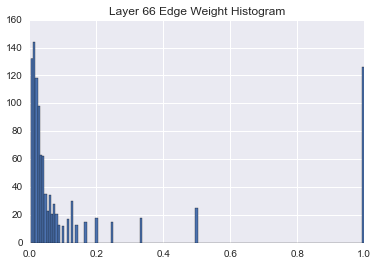

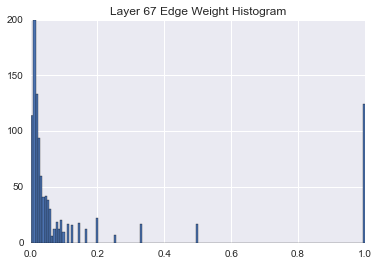

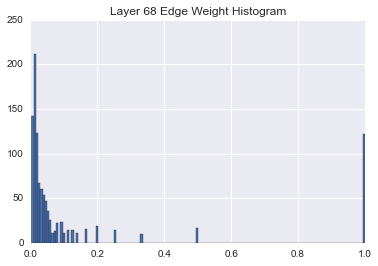

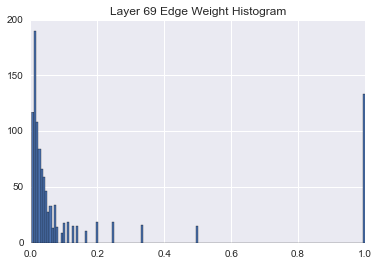

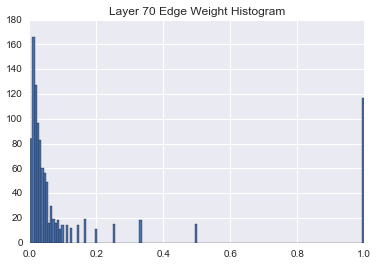

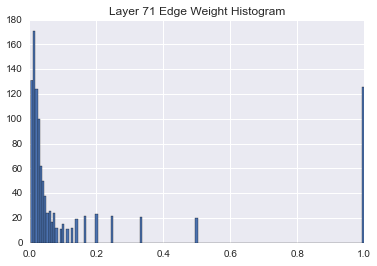

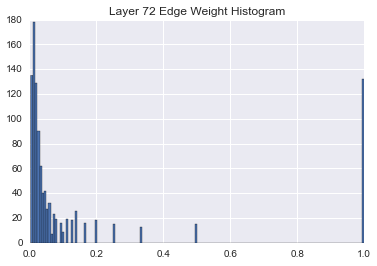

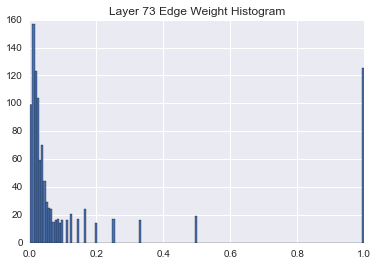

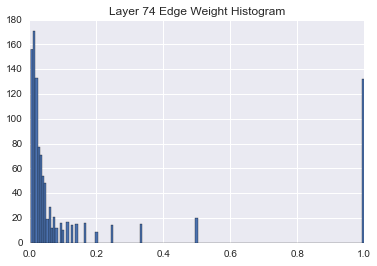

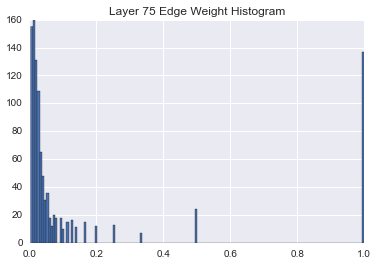

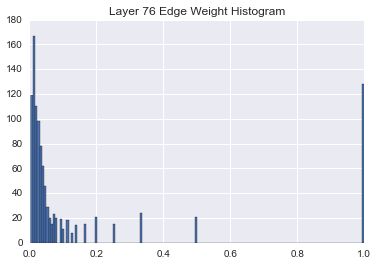

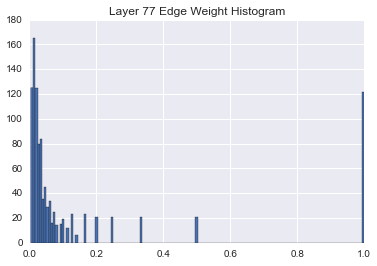

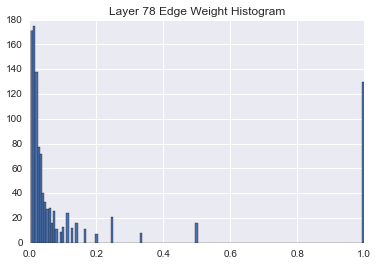

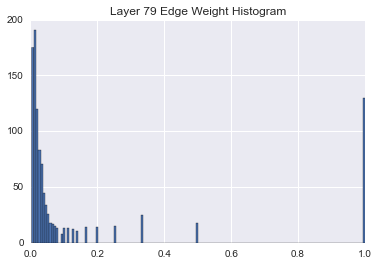

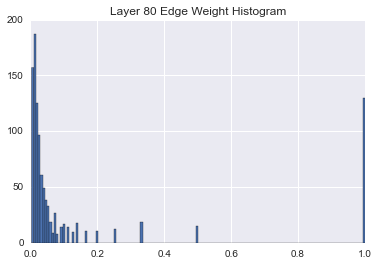

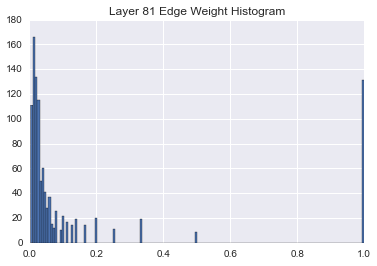

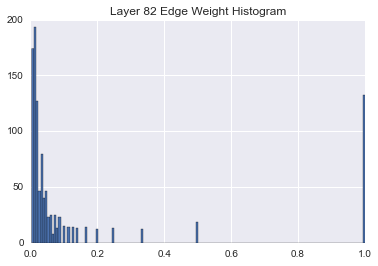

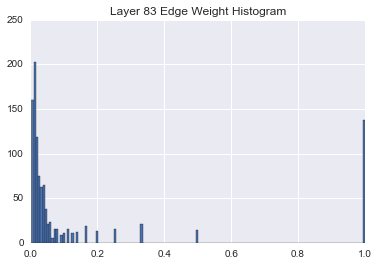

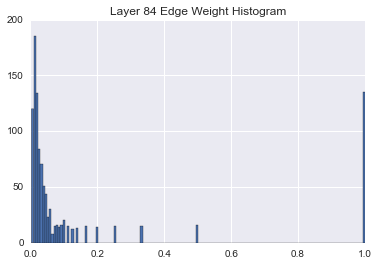

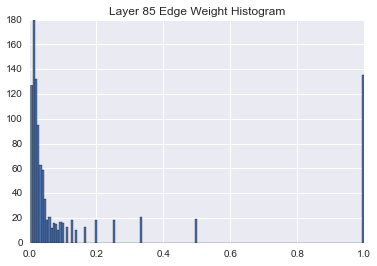

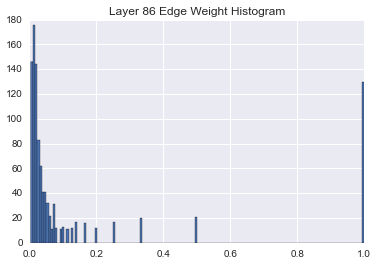

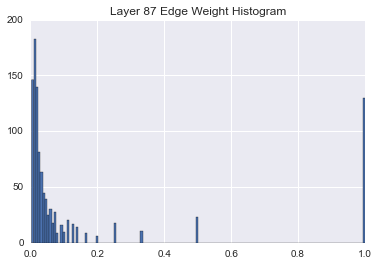

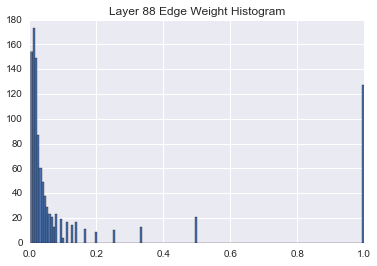

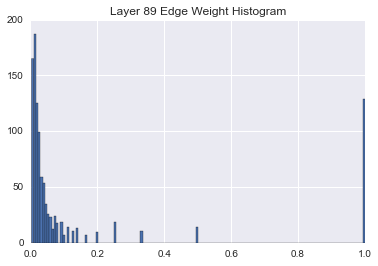

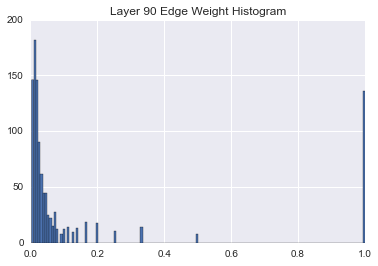

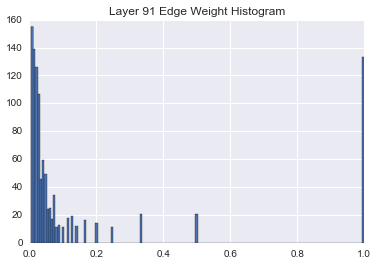

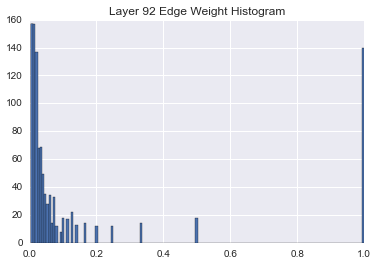

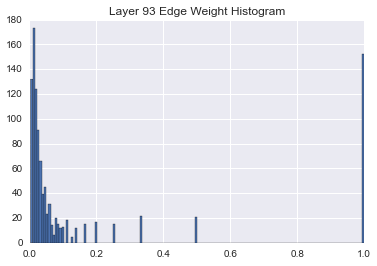

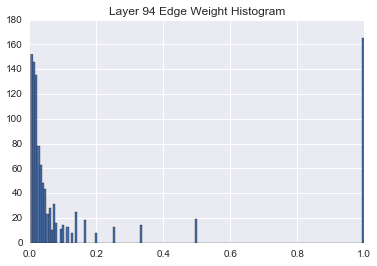

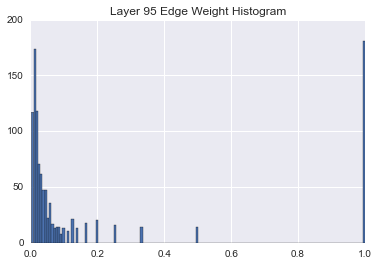

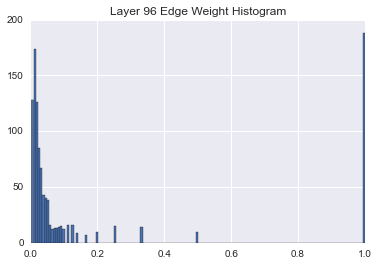

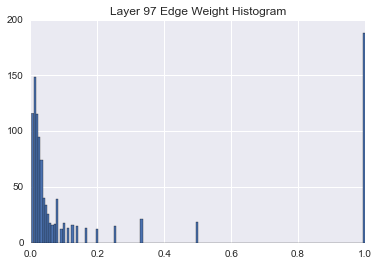

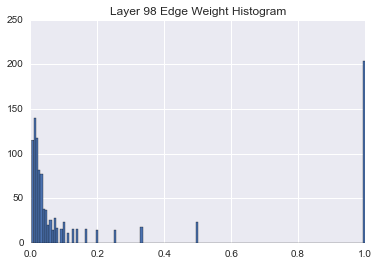

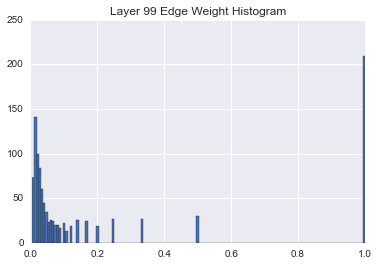

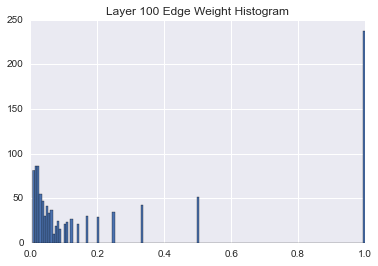

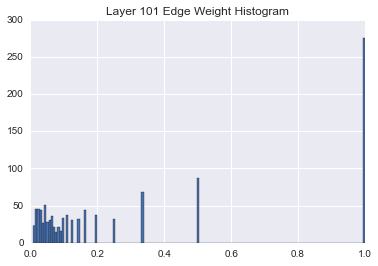

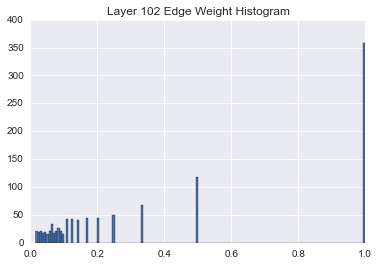

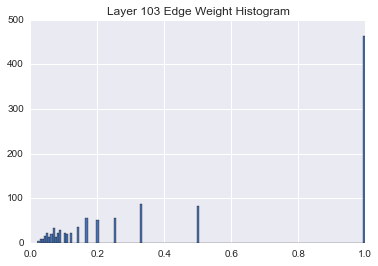

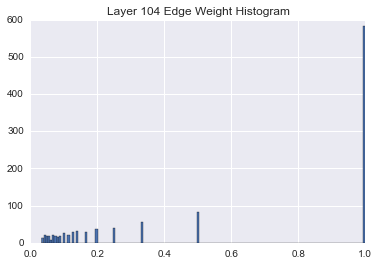

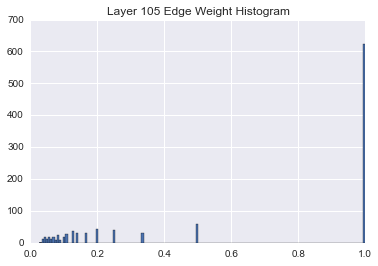

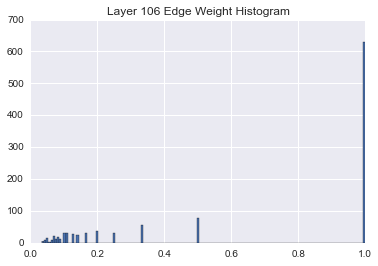

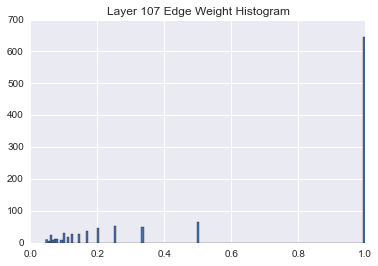

In [19]:
count = 0
for distr in distributions:
    plt.hist(distr, bins=150)
    plt.title("Layer " + str(count) + " Edge Weight Histogram")
    plt.show()
    count+=1

### Edge Weight Histogram  - All Layers

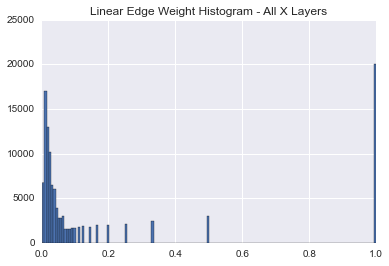

In [20]:
concat_distr = []
for distr in distributions:
    concat_distr = concat_distr + distr

plt.hist(concat_distr, bins=150)
plt.title("Linear Edge Weight Histogram - All X Layers")
plt.show()

That looks very similar to the distribution down the Y axis.

### Edge Weight Means

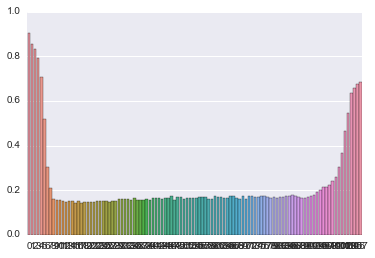

In [21]:
x_edge_means = []
for distrib in distributions:
    x_edge_means.append(np.mean(distrib))

sns.barplot(x=range(len(x_edge_means)), y=x_edge_means)
sns.plt.show()

It appears that we're seeing peaks where padding would be in the image. Thus, we can see why scaling is useful. From now on, we can probably assume that the non-linear, unscaled distributions aren't saying as much about the data in the regions of interest as they are saying simply about the density itself. This is likely from the unscaled aspect rather than the non-linear aspect. Let's keep going with this non-linear, unscaled analysis, then look at what happens when we use the scaled function for edge weighting.

### Edge Weight Variances

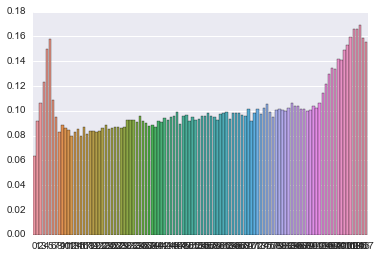

In [23]:
x_edge_vars = []
for distrib in distributions:
    x_edge_vars.append(np.var(distrib)) 

sns.barplot(x=range(len(x_edge_vars)), y=x_edge_vars)
sns.plt.show()

### Edge Weight Skewness

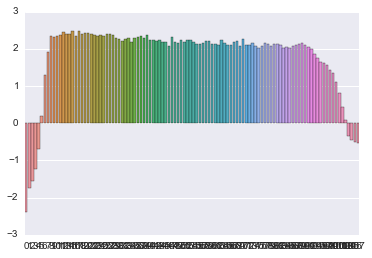

In [25]:
x_edge_skews = []
for distrib in distributions:
    x_edge_skews.append(skew(distrib)) 

sns.barplot(x=range(len(x_edge_skews)), y=x_edge_skews)
sns.plt.show()

### Edge Weight Kurtosis

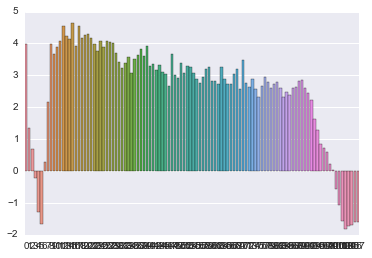

In [26]:
x_edge_kurts = []
for distrib in distributions:
    x_edge_kurts.append(kurtosis(distrib)) 

sns.barplot(x=range(len(x_edge_kurts)), y=x_edge_kurts)
sns.plt.show()